# MNIST sample tutorial
In this notebook we'll see two sample tutorials about building models to perform **binary** classification and **multi-class** classification. <br><br>


In [ ]:
# Packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# One-hot encoding function
from tensorflow.keras.utils import to_categorical


## Dataset 
Loading dataset & visualize some samples.

In [ ]:
# load dataset
(trainX, trainY), (testX, testY) = mnist.load_data()

# Also preparing data points
trainX = trainX.reshape(-1, 28, 28, 1)
testX = testX.reshape(-1, 28, 28, 1)

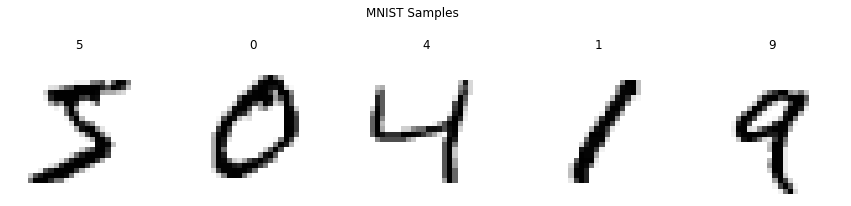

In [ ]:
# Visualize some samples
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (15, 3.5))
fig.suptitle('MNIST Samples')

ax1.imshow(trainX[0,:,:,0], cmap = 'gray_r')
ax1.set_title(trainY[0])
ax1.axis('off')
ax2.imshow(trainX[1,:,:,0], cmap = 'gray_r')
ax2.set_title(trainY[1])
ax2.axis('off')
ax3.imshow(trainX[2,:,:,0], cmap = 'gray_r')
ax3.set_title(trainY[2])
ax3.axis('off')
ax4.imshow(trainX[3,:,:,0], cmap = 'gray_r')
ax4.set_title(trainY[3])
ax4.axis('off')
ax5.imshow(trainX[4,:,:,0], cmap = 'gray_r')
ax5.set_title(trainY[4])
ax5.axis('off')
plt.show()

### Data preparation

In [ ]:
# Transforming train & test labels to one-hot encoding 
trainY_encoded = to_categorical(trainY)
testY_encoded = to_categorical(testY)

# Having a look 
print('First label (5):', trainY[0], '\nEncoded:', trainY_encoded[0])

First label (5): 5 
Encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Applying **one-hot encoding** to this labels looks like is the only step to be applied in order to fit data to the model. <br><br>

Although this could be used, notice the dataset values are from 0 to 255. **Normalizing** this values is a key point to help the model converge but both could be used.

In [ ]:
# Data preparation
trainX = trainX.astype('float32')
testX = testX.astype('float32')

# Normalize data
trainX = trainX / '_____'
testX = testX / '_____'

## CNN model

### Building model

Epoch 1/25
235/235 [==============================] - 35s 144ms/step - loss: 2.2680 - accuracy: 0.2574 - val_loss: 2.2264 - val_accuracy: 0.3752
Epoch 2/25
235/235 [==============================] - 30s 126ms/step - loss: 2.1749 - accuracy: 0.4405 - val_loss: 2.1069 - val_accuracy: 0.5036
Epoch 3/25
235/235 [==============================] - 30s 129ms/step - loss: 2.0300 - accuracy: 0.5508 - val_loss: 1.9277 - val_accuracy: 0.6079
Epoch 4/25
235/235 [==============================] - 30s 128ms/step - loss: 1.8238 - accuracy: 0.6446 - val_loss: 1.6845 - val_accuracy: 0.6923
Epoch 5/25
235/235 [==============================] - 30s 126ms/step - loss: 1.5628 - accuracy: 0.7139 - val_loss: 1.3984 - val_accuracy: 0.7557
Epoch 6/25
235/235 [==============================] - 30s 126ms/step - loss: 1.2847 - accuracy: 0.7626 - val_loss: 1.1243 - val_accuracy: 0.7913
Epoch 7/25
235/235 [==============================] - 30s 126ms/step - loss: 1.0421 - accuracy: 0.7933 - val_loss: 0.9099 - val_ac

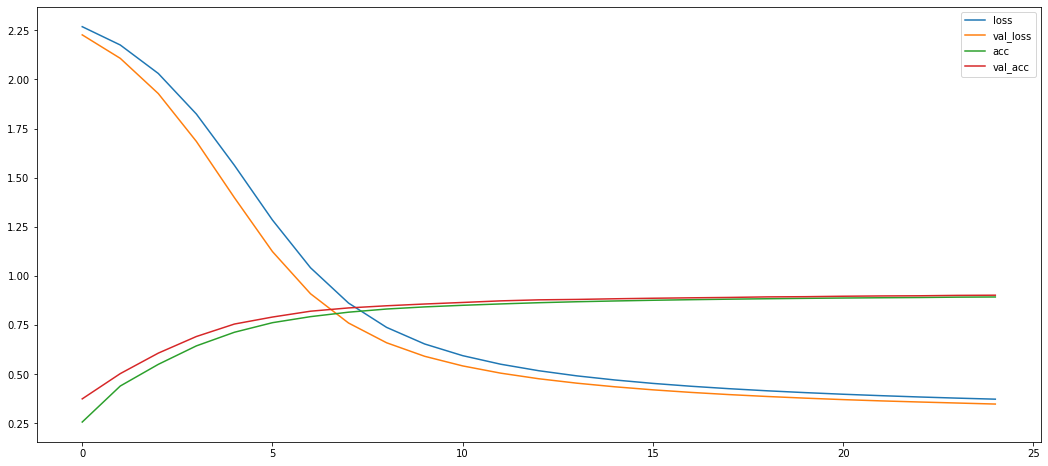

In [ ]:
model_1 = models.Sequential()

model_1.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))   # Down-samples the feature space
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(32, activation = 'relu'))

# Consider how many classes and the activation for them
model_1.add(tf.keras.layers.Dense('_____', activation='_____'))

# Optimizer + compile
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)

# Since there are several classes, the loss is not binary_crossentropy
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model, history will allow use to evaluate results
history = model_1.fit(trainX, trainY_encoded, validation_data = (testX, testY_encoded), batch_size = 256, epochs = 25)


plt.figure(figsize = (18, 8))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

Epoch 1/25
235/235 [==============================] - 21s 87ms/step - loss: 1.8622 - accuracy: 0.4551 - val_loss: 1.3549 - val_accuracy: 0.7266
Epoch 2/25
235/235 [==============================] - 20s 87ms/step - loss: 1.0953 - accuracy: 0.7746 - val_loss: 0.8627 - val_accuracy: 0.8260
Epoch 3/25
235/235 [==============================] - 20s 87ms/step - loss: 0.7713 - accuracy: 0.8350 - val_loss: 0.6582 - val_accuracy: 0.8605
Epoch 4/25
235/235 [==============================] - 20s 87ms/step - loss: 0.6210 - accuracy: 0.8602 - val_loss: 0.5510 - val_accuracy: 0.8783
Epoch 5/25
235/235 [==============================] - 20s 86ms/step - loss: 0.5354 - accuracy: 0.8752 - val_loss: 0.4849 - val_accuracy: 0.8902
Epoch 6/25
235/235 [==============================] - 20s 86ms/step - loss: 0.4797 - accuracy: 0.8852 - val_loss: 0.4394 - val_accuracy: 0.8992
Epoch 7/25
235/235 [==============================] - 20s 86ms/step - loss: 0.4403 - accuracy: 0.8926 - val_loss: 0.4068 - val_accuracy:

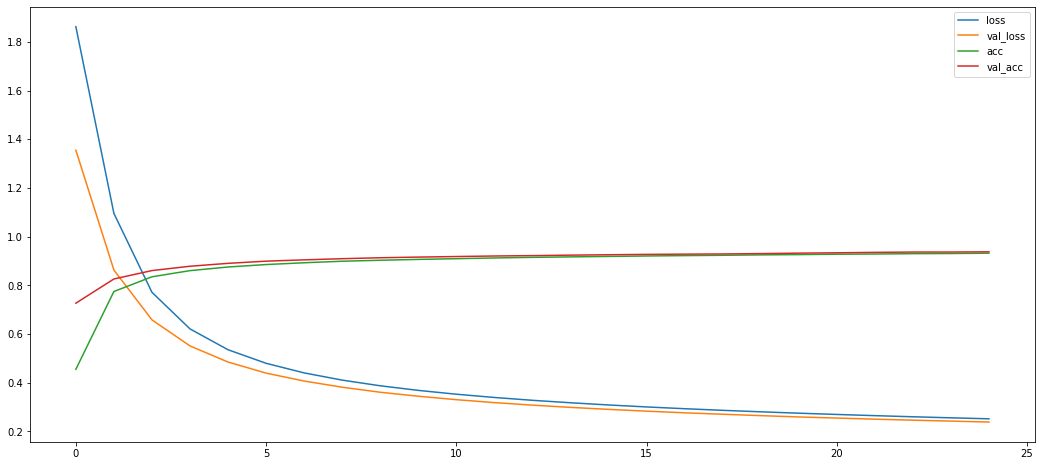

In [ ]:
model_2 = models.Sequential()
# (Image size + channels!)
model_2.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape='_____'))

# Select the pool size (squared)
model_2.add(tf.keras.layers.MaxPool2D('_____'))

model_2.add(tf.keras.layers.Flatten())

# Add as many layers as you want!
model_2.add(tf.keras.layers.Dense(64, activation='relu'))

model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


history2 = model_2.fit(trainX, trainY_encoded, validation_data = (testX, testY_encoded), batch_size = 256, epochs = 25)


plt.figure(figsize = (18, 8))
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.plot(history2.history['accuracy'], label='acc')
plt.plot(history2.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

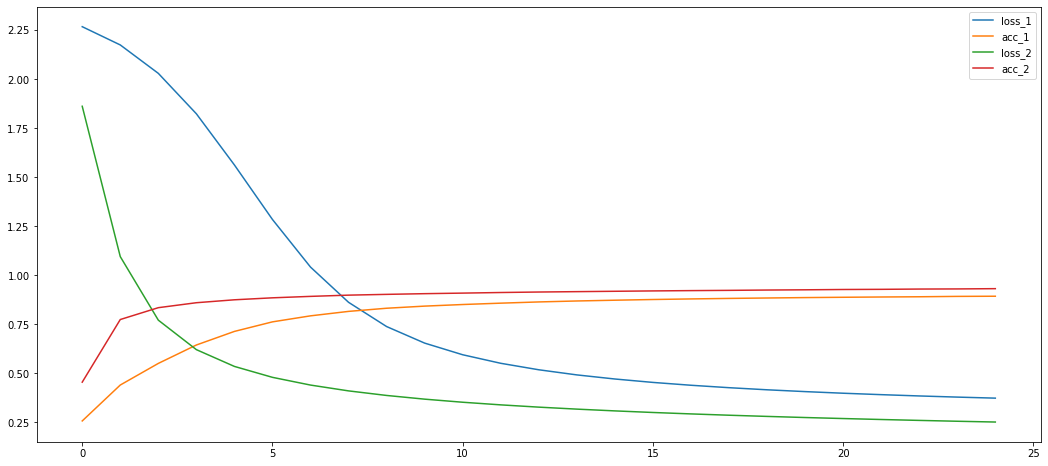

In [ ]:
plt.figure(figsize = (18, 8))
plt.plot(history.history['loss'], label='loss_1')
plt.plot(history.history['accuracy'], label='acc_1')
plt.plot(history2.history['loss'], label='loss_2')
plt.plot(history2.history['accuracy'], label='acc_2')
plt.legend()
plt.show()